In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Bitcoin = pd.read_csv("Bitcoin.csv")

In [4]:
Bitcoin # 비트코인 데이터

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [8]:
start_date = Bitcoin.get(Bitcoin["Date"]=="2016-06-01") # 2016년 6월 부터
start_date

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,34042500.0,6498830000


In [10]:
date_end = Bitcoin.get(Bitcoin["Date"]=="2017-06-30") # 2017년 6월까지
date_end

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
84,84,2017-06-30,2539.24,2559.25,2478.43,2480.84,860273000.0,41689100000


In [12]:
Bitcoin_date = Bitcoin.iloc[84:626,1:2] 
#iloc: 행 인덱스나 열 인덱스를 지정해주어 특정 값을 추출해 오는 방법 / 데이터프레임.iloc[행 인덱스, 열 인덱스,]
# 여기서는 84행~625행까지의 데이터를의 1열(Date) 만 출력
Bitcoin_date

,Date
84,2017-06-30
85,2017-06-29
86,2017-06-28
87,2017-06-27
88,2017-06-26
...,...
621,2016-10-01
622,2016-09-01
623,2016-08-01
624,2016-07-01


In [15]:
# 이동평균법: 과거로부터 현재까지지의 시계열 자료를 대상으로 일정기간별 이동평균을 계산하고 이들의 추세를 파악하여 다음 기간을 예측하는 방법
Bitcoin_open_5MA = Bitcoin["Open"].rolling(window=5).mean()
# rolling 함수: Pandas 이동평균 함수. 현재 열에 대하여 일정크기의 window를 이용하여 그 window 안의 값을 추가 메서드(sum, mean등)를 통해 계산
# window: 계산할 창의 크기. 열 기준으로 계산할 경우 행의 수. 이 문제의 경우도 행의 수.
# mean: 평균계산
Bitcoin_open_5MA = pd.DataFrame(Bitcoin_open_5MA) #데이터프레임화
Bitcoin_open_5MA = Bitcoin_open_5MA.iloc[84:626] # 데이터프레임에서 우리가 필요 정보 추출
Bitcoin_open_5MA

,Open
84,2505.560
85,2506.872
86,2517.766
87,2526.176
88,2545.770
...,...
621,442.416
622,446.634
623,451.208
624,447.574


In [17]:
Bitcoin_data = pd.concat([Bitcoin_date,Bitcoin_open_5MA], axis=1) # concat: 데이터프레임 합치기. axis = 1은 열 기준. 데이터프레임이 옆으로 붙음
# axis = 0은 행 기준. 데이터프레임이 위/아래로 쌓임.
Bitcoin_data = Bitcoin_data.sort_index(ascending=False) #합쳐진 데이터프레임을 내림차순으로 배열
Bitcoin_data

,Date,Open
625,2016-06-01,444.206
624,2016-07-01,447.574
623,2016-08-01,451.208
622,2016-09-01,446.634
621,2016-10-01,442.416
...,...,...
88,2017-06-26,2545.770
87,2017-06-27,2526.176
86,2017-06-28,2517.766
85,2017-06-29,2506.872


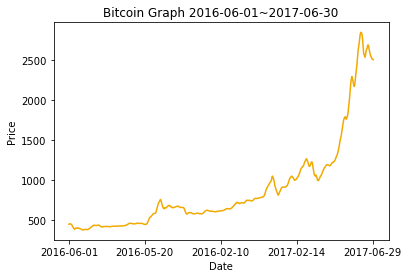

In [38]:
# 그래프 그려주기
x = Bitcoin_data["Date"]
y = Bitcoin_data["Open"]

plt.plot(x,y,color = "#f2a900") # 선 색은 노란색. 
plt.title("Bitcoin Graph 2016-06-01~2017-06-30")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks([i for i in range(0,541,135)]) #list comprehension 활용하여 x축 눈금 설정

plt.show()